ORGANICS

Содержание проблемы: супермаркет начинает предлагать новую линию органических продуктов. Руководство супермаркета хотело бы определить, какие покупатели могут приобрести эти продукты.
В супермаркете действует программа лояльности клиентов. В качестве первоначального плана стимулирования покупателей супермаркет предоставлял купоны на свои органические продукты всем участникам программы лояльности и теперь собирает данные, которые включают информацию о том, приобрели ли эти клиенты какие-либо из органических продуктов или нет.  

In [1]:
import numpy as np
import pandas as pd
import pylab as pl
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from graphviz import Source

In [2]:
df = pd.read_csv("C:\ORGANICS.csv",encoding="cp1251")
print(df.shape) 
print(df.info())

(22223, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22223 entries, 0 to 22222
Data columns (total 13 columns):
ID                 22223 non-null int64
DemAffl            21138 non-null float64
DemAge             20715 non-null float64
DemCluster         21549 non-null float64
DemClusterGroup    21549 non-null object
DemGender          19711 non-null object
DemReg             21758 non-null object
DemTVReg           21758 non-null object
PromClass          22223 non-null object
PromSpend          22223 non-null float64
PromTime           21942 non-null float64
TargetBuy          22223 non-null int64
TargetAmt          22223 non-null int64
dtypes: float64(5), int64(3), object(5)
memory usage: 2.2+ MB
None


In [3]:
# Проверка на пропущенные данные
df.isnull().any().any()

True

In [4]:
def missing_values_table(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        return mis_val_table_ren_columns

In [5]:
missing_values_table(df)

,Missing Values,% of Total Values
DemGender,2512,11.3
DemAge,1508,6.8
DemAffl,1085,4.9
DemCluster,674,3.0
DemClusterGroup,674,3.0
DemReg,465,2.1
DemTVReg,465,2.1
PromTime,281,1.3


In [6]:
# Удаление Nan
df.dropna()

,ID,DemAffl,DemAge,DemCluster,DemClusterGroup,DemGender,DemReg,DemTVReg,PromClass,PromSpend,PromTime,TargetBuy,TargetAmt
0,140,10.0,76.0,16.0,C,U,Midlands,Wales & West,Gold,16000.00,4.0,0,0
1,620,4.0,49.0,35.0,D,U,Midlands,Wales & West,Gold,6000.00,5.0,0,0
2,868,5.0,70.0,27.0,D,F,Midlands,Wales & West,Silver,0.02,8.0,1,1
3,1120,10.0,65.0,51.0,F,M,Midlands,Midlands,Tin,0.01,7.0,1,1
4,2313,11.0,68.0,4.0,A,F,Midlands,Midlands,Tin,0.01,8.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22216,52830893,13.0,49.0,8.0,B,M,South East,London,Silver,500.00,9.0,0,0
22218,52834058,13.0,65.0,9.0,B,F,South East,London,Silver,1500.00,5.0,0,0
22219,52834376,15.0,73.0,34.0,D,U,South East,S & S East,Gold,6053.06,12.0,0,0
22220,52837057,9.0,70.0,15.0,B,F,North,Yorkshire,Gold,6000.00,5.0,0,0


In [7]:
# Замена Nan усредненными значениями
df = df.fillna(df.mean())

In [77]:
# Замена Nan наиболее часто встречаемыми значениями
df = df.fillna(df.mod)

In [53]:
x = df[['DemAffl',  'DemAge', 'DemCluster', 'PromSpend', 'PromTime']]
y = df['TargetBuy']
y = y.astype('int')

Обучение модели:

In [10]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
dtree = DecisionTreeClassifier(max_depth=4, random_state=0)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [26]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


In [29]:
# Export as dot file
export_graphviz(dtree, out_file='tree.dot', 
                rounded = True, proportion = False, 
                precision = 2, filled = True)

import pydot as p
(graph, ) = p.graph_from_dot_file('tree.dot')

graph.write_png('tree.png')

In [31]:
dtree.score(X_train, y_train) 

0.7995628696322962

In [32]:
dtree.score(X_test,y_test)

0.7955602219889005

### Задание 1

a)	Обучите решающее дерево с параметрами criterion = entropy и max_depth =5.  Какую точность дает данное дерево на контроле? 

In [49]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(x, y, test_size=0.3)
dtree2 = DecisionTreeClassifier(max_depth = 5, criterion = 'entropy', min_samples_leaf = 1)
dtree2.fit(X_train2, y_train2)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [37]:
export_graphviz(dtree2, out_file='tree2.dot', 
                rounded = True, proportion = False, 
                precision = 2, filled = True)
(graph, ) = p.graph_from_dot_file('tree2.dot')

graph.write_png('tree2.png')

In [64]:
dtree2.score(X_train2,y_train2)

0.8062483929030599

In [41]:
dtree2.score(X_test2,y_test2)

0.8036598170091496

In [78]:
pip install PrettyTable

  Created wheel for PrettyTable: filename=prettytable-0.7.2-cp37-none-any.whl size=13706 sha256=08d57c2a2d6a54dac37e405f73687968d44b33e099c5eef5acd29dd106d21422
  Stored in directory: C:\Users\smysh\AppData\Local\pip\Cache\wheels\80\34\1c\3967380d9676d162cb59513bd9dc862d0584e045a162095606
Successfully built PrettyTable
Note: you may need to restart the kernel to use updated packages.


Создадим 5 деревьев с разными свойствами и получим таблицу:

In [79]:
from prettytable import PrettyTable 
th = ['max_depth','min_samples_leaf','train_score','test_score']
td = ['4','1','0.7995628696322962','0.7955602219889005',
      '5','1','0.8062483929030599','0.8036598170091496',
      '3','3','0.7960915402417074','0.7910604469776511',
      '2','4','0.7877346361532528','0.7861106944652767',
      '4','2','0.8013628182051942','0.7969101544922754',
     ]

columns = len(th)

table = PrettyTable(th)
td_data = td[:]

while td_data:

    table.add_row(td_data[:columns]).
    td_data = td_data[columns:]

print(table)

+-----------+------------------+--------------------+--------------------+
| max_depth | min_samples_leaf |    train_score     |     test_score     |
+-----------+------------------+--------------------+--------------------+
|     4     |        1         | 0.7995628696322962 | 0.7955602219889005 |
|     5     |        1         | 0.8062483929030599 | 0.8036598170091496 |
|     3     |        3         | 0.7960915402417074 | 0.7910604469776511 |
|     2     |        4         | 0.7877346361532528 | 0.7861106944652767 |
|     4     |        2         | 0.8013628182051942 | 0.7969101544922754 |
+-----------+------------------+--------------------+--------------------+


Рассмотрим зависимости оценок для конкретных признаков отдельно:

In [95]:
max_depth_values = range(1, 10)
result = pd.DataFrame()

In [96]:
for max_depth in max_depth_values:    
    tree = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    tree.fit(X_train, y_train)
    train_score = tree.score(X_train, y_train)
    test_score = tree.score(X_test,y_test)
    
    temp_result = pd.DataFrame({'max_depth': [max_depth], 
                                'min_samples_leaf' : '1',
                                    'train_score': [train_score],
                                    'test_score': test_score})
    result = result.append(temp_result)

In [97]:
result

,max_depth,min_samples_leaf,train_score,test_score
0,1,1,0.762021,0.765412
0,2,1,0.795063,0.792110
0,3,1,0.797056,0.789711
0,4,1,0.798856,0.794360
0,5,1,0.803163,0.794510
0,6,1,0.806891,0.799760
0,7,1,0.809013,0.797060
0,8,1,0.813577,0.793010
0,9,1,0.818269,0.791360


In [98]:
result_long = pd.melt(result, id_vars=['max_depth'], value_vars=['train_score', 'test_score'],var_name = 'type_score', value_name='score')
result_long

,max_depth,type_score,score
0,1,train_score,0.762021
1,2,train_score,0.795063
2,3,train_score,0.797056
3,4,train_score,0.798856
4,5,train_score,0.803163
5,6,train_score,0.806891
6,7,train_score,0.809013
7,8,train_score,0.813577
8,9,train_score,0.818269
9,1,test_score,0.765412


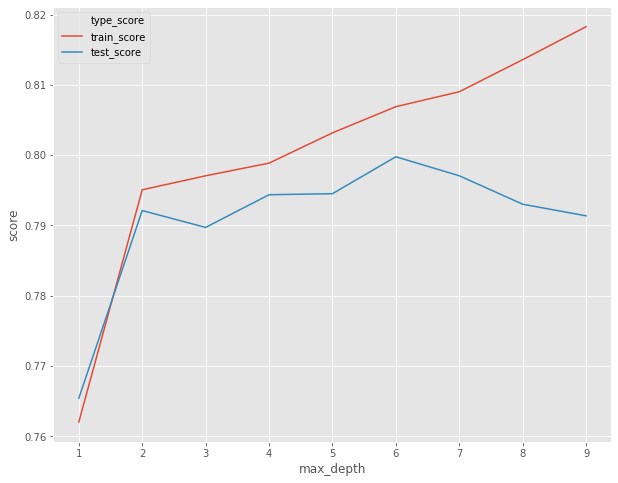

In [101]:
sns.lineplot(x="max_depth", y="score", hue="type_score", data=result_long)

C увеличением глубины с определенного момента оценка для тестовой выборки начнет уменьшаться, а для тренировочной - увеличиваться. Оптимальная глубина - 5-6.

In [102]:
min_sample_leafs = range(1, 10)
result2 = pd.DataFrame()

In [103]:
for min_leafs in min_sample_leafs:    
    tree = DecisionTreeClassifier(criterion='entropy', min_samples_leaf = min_leafs, max_depth = 5)
    tree.fit(X_train, y_train)
    train_score = tree.score(X_train, y_train)
    test_score = tree.score(X_test,y_test)
    
    temp_result = pd.DataFrame({'max_depth': '5', 
                                'min_samples_leaf' : [min_leafs],
                                    'train_score': [train_score],
                                    'test_score': test_score})
    result2 = result2.append(temp_result)

In [104]:
result2

,max_depth,min_samples_leaf,train_score,test_score
0,5,1,0.803163,0.79451
0,5,2,0.803163,0.79451
0,5,3,0.803163,0.79451
0,5,4,0.803163,0.79451
0,5,5,0.803163,0.79451
0,5,6,0.803163,0.79451
0,5,7,0.803163,0.79451
0,5,8,0.803163,0.79451
0,5,9,0.803163,0.79451


In [105]:
result2_long = pd.melt(result2, id_vars=['min_samples_leaf'], value_vars=['train_score', 'test_score'],
                          var_name = 'set_type', value_name='score')
result2_long

,min_samples_leaf,set_type,score
0,1,train_score,0.803163
1,2,train_score,0.803163
2,3,train_score,0.803163
3,4,train_score,0.803163
4,5,train_score,0.803163
5,6,train_score,0.803163
6,7,train_score,0.803163
7,8,train_score,0.803163
8,9,train_score,0.803163
9,1,test_score,0.794510


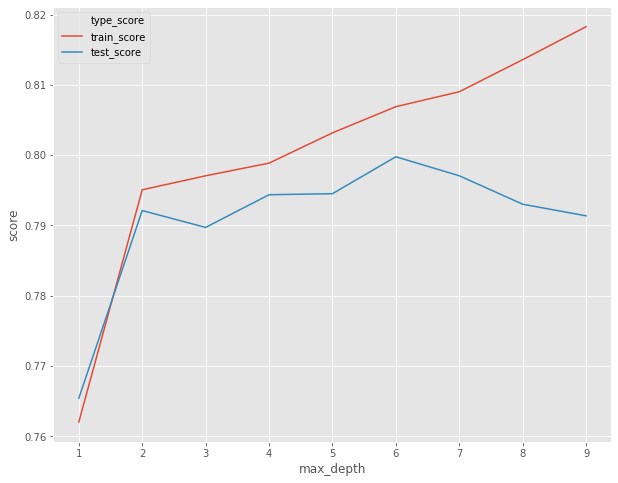

In [107]:
sns.lineplot(x="max_depth", y="score", hue="type_score", data=result_long)

In [ ]:
C увеличением глубины с определенного момента оценка для тестовой выборки начнет уменьшаться,
а для тренировочной - увеличиваться. Оптимальная глубина - 5-6.